# **Tổng quan về K-Nearest Neighbors (KNN)**

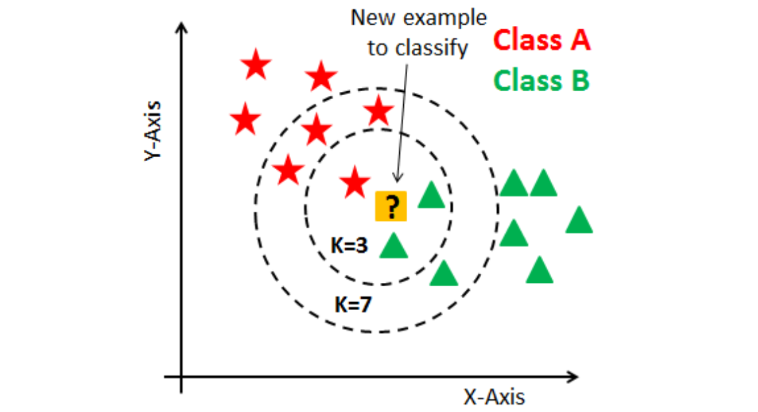

Như trên hình ta thấy rằng khi có 1 điểm nó nằm giữa hai class việc chia điểm đó thuộc class nào là không được. Từ đó thuật toán KNN giải quyết điều này bằng việc. Tính khoảng cách từ điểm đó đến các điểm còn lại sau đó lấy mode của K điểm gần nó nhất.

# **Cách hoạt động của KNN**

**Thuật toán KNN**: Thuật toán KNN cho rằng những dữ liệu tương tự nhau sẽ tồn tại gần nhau trong một không gian. Từ đó dùng khoảng cách của chúng trong không gian để dự đoán 1 dữ liệu gì đó.
Có nhiều cách tính khoảng cách như Euclidean, Manhattan, Minkowski,...

**Có 2 loại bài toán liên quan KNN**:

- **KNN Classification** : Dựa vào giá trị mode nhận được từ k điểm gần nó nhất.
- **KNN Regression**: Dựa vào giá trị trung bình nhận được từ k điểm gần nó nhất.

**Một số loại độ đo thường dùng**:


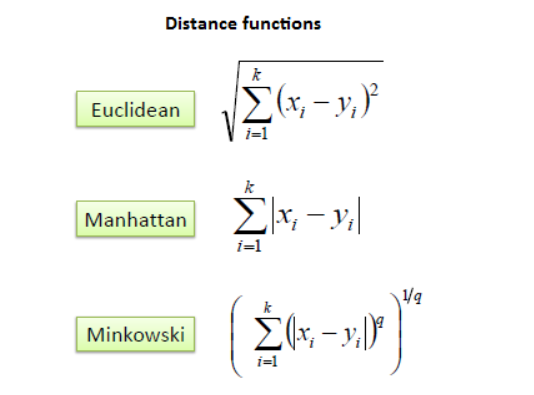

https://codelearn.io/sharing/thuat-toan-k-nearest-neighbors-knn

# **Ưu điểm và nhược điểm**

**Điểm mạnh**: KNN sẽ liên tục cập nhật dữ liệu, ví dụ dữ liệu có thay đổi nhiều thì lúc nào chạy KNN nó cũng sẽ có được thông tin của dữ liệu đó, trong khi do Kmeans và cách tính cluster thì nếu để lâu không train lại thì sẽ có nhiều sai số do có nhiều data mới đến, ngoài ra KNN không tốn thời gian training.

**Điểm yếu**: KNN mỗi lần dự đoán sẽ rất lâu vì phải tính khoảng cách của toàn bộ các điểm trong dataset.

# **KNN Regression**

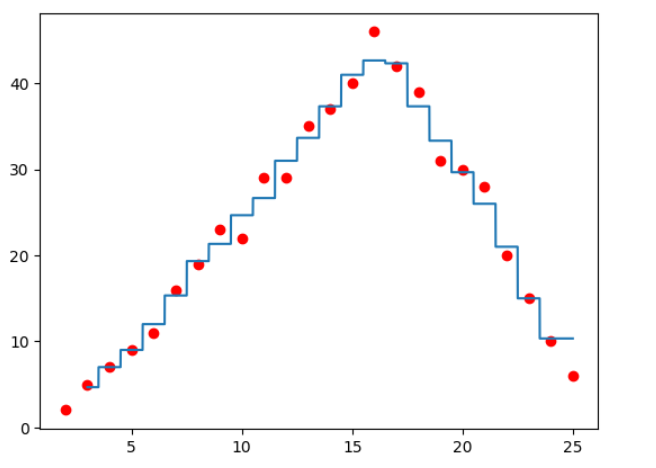

Khi cần dự đoán 1 điểm nào đó việc cần làm với thuật toán này là tìm ra k điểm đó nhất sau đó chọn ra trung bình của k điểm đó là giá trị dự đoán.

Tuy nhiên ta sẽ thấy một điểm hạn chế là khi có một giá trị nào đó là outlier thì việc dự đoán của nó là không tốt do cách tính của nó dự trên lấy trung bình.

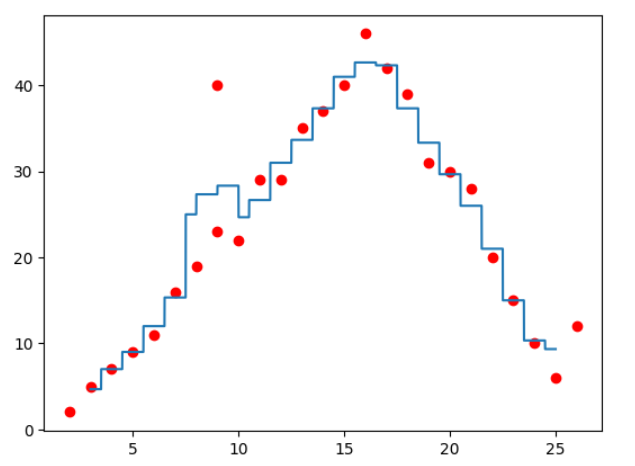

# **Implement thuật toán KNN**

**Import thư viện**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import nan_euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

**KNN Regression**

In [ ]:
class KNeighborsRegressorFromScratch:
    def __init__(self, k=5, p=3, metric='euclid'):
        self.k = k
        self.X = None
        self.y = None
        self.p = p
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X = np.array(X_train, dtype=float)
        self.y = np.array(y_train, dtype=float)
        return self

    # Euclidean
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2, axis=1))

    # Manhattan
    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2), axis=1)

    # Minkowski
    def minkowski_distance(self, x1, x2, p):
        return np.sum(np.abs(x1 - x2)**p, axis=1)**(1/p)

    # Cosine
    def cosine_distances(self, x1, x2):
        numerator = np.dot(x2, x1.T)
        denominator = np.linalg.norm(x1) * np.linalg.norm(x2, axis=1)
        return 1 - (numerator / denominator)

    def predict(self, X):
        X = np.array(X, dtype=float)
        y_pred = np.zeros(X.shape[0])
        distances = None
        # Lựa chọn metric
        for i, x in enumerate(X):
            if self.metric == 'euclid':
                distances = self.euclidean_distance(x, self.X)
            elif self.metric == 'manhattan':
                distances = self.manhattan_distance(x, self.X)
            elif self.metric == 'minkowski':
                distances = self.minkowski_distance(x, self.X, self.p)
            elif self.metric == 'cosine':
                distances = self.cosine_distances(x, self.X)
            else:
                raise ValueError(f"Unknown metric: {self.metric}")
            # Sắp xếp và trả về kết quả
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y[k_nearest_indices]
            y_pred[i] = np.mean(k_nearest_labels)
        return y_pred

    # R2
    def score(self, X, y):
        y_pred = self.predict(X)
        u = np.sum((y - y_pred) ** 2)
        v = np.sum((y - np.mean(y)) ** 2)
        return 1 - (u / v)

    # Dùng cho các gridSearchCV
    def get_params(self, deep=True):
        return {'k': self.k, 'p': self.p, 'metric': self.metric}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# **Data Preprocessing**


Load data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/KhiemDangLe/Final-Project/main/DataFolder/5_preprocessed_data.csv')

In [ ]:
df.columns

Index(['article_id', 'category', 'phone', 'district', 'date_posted', 'area',
       'bedroom', 'wc', 'direction', 'balcony_direction', 'total_room_LLm',
       'count_conveniences', 'alleyway_property', 'under_mortgage',
       'furnished', 'has_lowerlevel', 'has_rooftop', 'numbers_of_floors',
       'street_name', 'price', 'price_per_m2'],
      dtype='object')

Lựa chọn các Feature phù hợp để giữ lại

In [ ]:
selection = [ 'category', 'phone', 'district', 'area',
       'bedroom', 'wc', 'direction', 'balcony_direction',
       'count_conveniences', 'alleyway_property', 'under_mortgage',
       'furnished', 'has_lowerlevel', 'has_rooftop', 'numbers_of_floors','price']

In [ ]:
df = df[selection]

Xóa các feature có missing value nhiều hơn 50%

In [ ]:
missing_ratio = df.isnull().mean()

# Lấy ra tên các cột có tỷ lệ giá trị thiếu lớn hơn 0.5
columns_with_high_missing = missing_ratio[missing_ratio > 0.5].index.tolist()

# Xóa các cột có tỷ lệ giá trị thiếu lớn hơn 0.5
df = df.drop(columns=columns_with_high_missing)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            5595 non-null   object 
 1   phone               5594 non-null   float64
 2   district            5595 non-null   object 
 3   area                5580 non-null   float64
 4   bedroom             4954 non-null   float64
 5   wc                  4537 non-null   float64
 6   count_conveniences  5595 non-null   int64  
 7   alleyway_property   4866 non-null   float64
 8   numbers_of_floors   5225 non-null   float64
 9   price               5595 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 437.2+ KB


In [ ]:
df.head()

,category,phone,district,area,bedroom,wc,count_conveniences,alleyway_property,numbers_of_floors,price
0,Nhà riêng,933670051.0,Nhà Bè,150.0,2.0,1.0,0,1.0,NaN,3.899
1,Nhà riêng,922351398.0,Tân Bình,51.0,NaN,NaN,2,1.0,3.0,5.500
2,Nhà,907340956.0,Phú Nhuận,45.0,2.0,2.0,2,1.0,2.0,4.600
3,Nhà riêng,849734646.0,Quận 5,41.0,NaN,NaN,0,NaN,2.0,7.350
4,Nhà,907340956.0,Bình Thạnh,33.0,3.0,3.0,4,NaN,3.0,4.000


Thực hiện encoding theo từng dạng:

**One Hot encoding**

In [ ]:
data_onehot = pd.get_dummies(df, columns=['category', 'district'])

data_onehot = data_onehot.astype({col: 'int64' for col in data_onehot.columns if col.startswith(('category_', 'district_'))})

**Label encoding**

In [ ]:
columns_label = ['category', 'district']

In [ ]:
data_label = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_label:
    data_label[col] = le.fit_transform(data_label[col])

**Target Encoding**

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from category_encoders import TargetEncoder

# Define the target encoder
encoder = TargetEncoder(cols=['category', 'district'])

# Fit and transform the DataFrame
data_target_encode = encoder.fit_transform(df, df['price'])



**Binary Encoding**

In [ ]:
!pip install category_encoders


In [ ]:
import pandas as pd
from category_encoders import BinaryEncoder

# Sample DataFrame

# Define the binary encoder
encoder = BinaryEncoder(cols=['category', 'district'])

# Fit and transform the DataFrame
data_binary = encoder.fit_transform(df)



**Frequency Encoding**

In [ ]:
data_frequency = df.copy()

In [ ]:
category_frequency = data_frequency['category'].value_counts().to_dict()
district_frequency = data_frequency['district'].value_counts().to_dict()

data_frequency['category'] = data_frequency['category'].map(category_frequency)
data_frequency['district'] = data_frequency['district'].map(district_frequency)


Điền missing values và thực hiện chọn lọc bộ data phù hợp

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=15)
data_onehot = pd.DataFrame(imputer.fit_transform(data_onehot), columns=data_onehot.columns)

In [ ]:
imputer = KNNImputer(n_neighbors=15)
data_binary = pd.DataFrame(imputer.fit_transform(data_binary), columns=data_binary.columns)

In [ ]:
imputer = KNNImputer(n_neighbors=15)
data_target_encode = pd.DataFrame(imputer.fit_transform(data_target_encode), columns=data_target_encode.columns)

In [ ]:
imputer = KNNImputer(n_neighbors=15)
data_frequency = pd.DataFrame(imputer.fit_transform(data_frequency), columns=data_frequency.columns)

In [ ]:
imputer = KNNImputer(n_neighbors=15)
data_label = pd.DataFrame(imputer.fit_transform(data_label), columns=data_label.columns)

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import MinMaxScaler


# Bảng dataset cho từng dạng encode
datasets = {
    'data_onehot': (data_onehot.drop(columns=['price']), data_onehot['price']),
    'data_binary': (data_binary.drop(columns=['price']), data_binary['price']),
    'data_target_encode': (data_target_encode.drop(columns=['price']), data_target_encode['price']),
    'data_frequency': (data_frequency.drop(columns=['price']), data_frequency['price']),
    'data_label' : (data_label.drop(columns=['price']), data_label['price'])
}

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Score
scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error'}
results_list = []

for name, (X, y) in datasets.items():
    # KNN Regression
    model = KNeighborsRegressorFromScratch(k=15)

    # Scale dữ liệu
    scaler = MinMaxScaler()

    X_scaled = scaler.fit_transform(X)
    results = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring, return_train_score=False)
    results_list.append({
        'Dataset': name,
        'Average R2 Score': np.mean(results['test_r2']),
        'Average MSE Score': -np.mean(results['test_mse'])
    })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results_list)



In [ ]:
results_df.head()

,Dataset,Average R2 Score,Average MSE Score
0,data_onehot,0.555442,1.874693
1,data_binary,0.554515,1.878482
2,data_target_encode,0.552183,1.887575
3,data_frequency,0.472557,2.223862
4,data_label,0.440119,2.360737


**Chọn data được encode theo dạng One hot**

# **Model**

In [ ]:
data = data_onehot

**Feature Selection**

In [ ]:
data.columns

Index(['phone', 'area', 'bedroom', 'wc', 'count_conveniences',
       'alleyway_property', 'numbers_of_floors', 'price',
       'category_Luxury home', 'category_Nhà', 'category_Nhà cổ',
       'category_Nhà riêng', 'district_Bình Chánh', 'district_Bình Thạnh',
       'district_Bình Tân', 'district_Củ Chi', 'district_Gò Vấp',
       'district_Hóc Môn', 'district_Nhà Bè', 'district_Phú Nhuận',
       'district_Quận 1', 'district_Quận 10', 'district_Quận 11',
       'district_Quận 12', 'district_Quận 2', 'district_Quận 3',
       'district_Quận 4', 'district_Quận 5', 'district_Quận 6',
       'district_Quận 7', 'district_Quận 8', 'district_Quận 9',
       'district_Thủ Đức', 'district_Tân Bình', 'district_Tân Phú'],
      dtype='object')

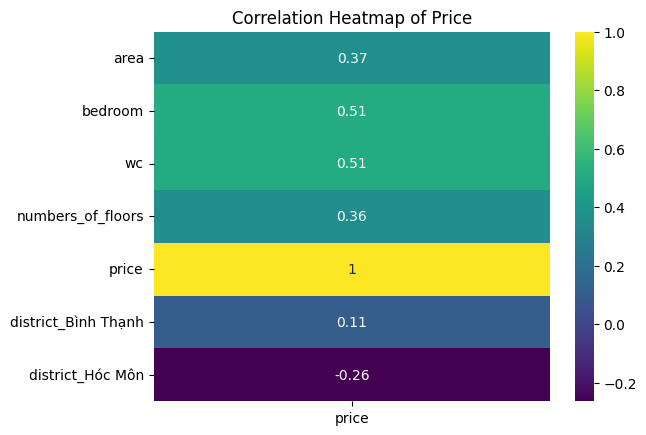

In [ ]:
# Vẽ heatmap với dữ liệu tương quan từ df
sns.heatmap(data.corr()['price'][(data.corr()['price'] >= 0.1) | (data.corr()['price'] <= -0.2)].to_frame(), annot=True, cmap = 'viridis')

# Đặt tiêu đề và nhãn trục
plt.title('Correlation Heatmap of Price')

# Hiển thị heatmap
plt.show()

In [ ]:
data.columns

Index(['phone', 'area', 'bedroom', 'wc', 'count_conveniences',
       'alleyway_property', 'numbers_of_floors', 'price',
       'category_Luxury home', 'category_Nhà', 'category_Nhà cổ',
       'category_Nhà riêng', 'district_Bình Chánh', 'district_Bình Thạnh',
       'district_Bình Tân', 'district_Củ Chi', 'district_Gò Vấp',
       'district_Hóc Môn', 'district_Nhà Bè', 'district_Phú Nhuận',
       'district_Quận 1', 'district_Quận 10', 'district_Quận 11',
       'district_Quận 12', 'district_Quận 2', 'district_Quận 3',
       'district_Quận 4', 'district_Quận 5', 'district_Quận 6',
       'district_Quận 7', 'district_Quận 8', 'district_Quận 9',
       'district_Thủ Đức', 'district_Tân Bình', 'district_Tân Phú'],
      dtype='object')

<Axes: >

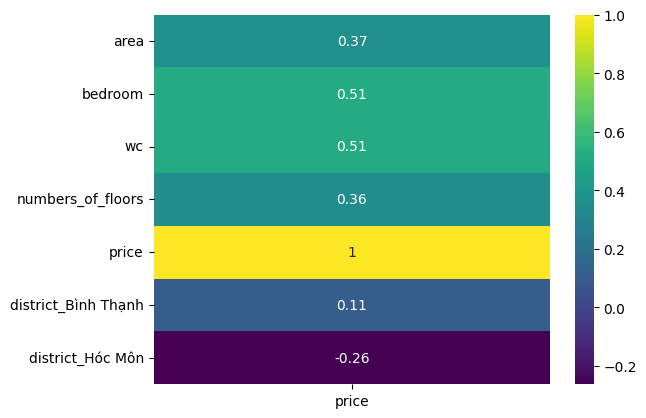

In [ ]:
sns.heatmap(data.corr()['price'][(data.corr()['price'] >= 0.1) | (data.corr()['price'] <= -0.2)].to_frame(), annot=True, cmap = 'viridis')

Chọn các feature sau cho mô hình 'district_...', 'area', 'bedroom', 'wc', 'count_conveniences', 'price', 'numbers_of_floors'

In [ ]:
data.columns

Index(['phone', 'area', 'bedroom', 'wc', 'count_conveniences',
       'alleyway_property', 'numbers_of_floors', 'price',
       'category_Luxury home', 'category_Nhà', 'category_Nhà cổ',
       'category_Nhà riêng', 'district_Bình Chánh', 'district_Bình Thạnh',
       'district_Bình Tân', 'district_Củ Chi', 'district_Gò Vấp',
       'district_Hóc Môn', 'district_Nhà Bè', 'district_Phú Nhuận',
       'district_Quận 1', 'district_Quận 10', 'district_Quận 11',
       'district_Quận 12', 'district_Quận 2', 'district_Quận 3',
       'district_Quận 4', 'district_Quận 5', 'district_Quận 6',
       'district_Quận 7', 'district_Quận 8', 'district_Quận 9',
       'district_Thủ Đức', 'district_Tân Bình', 'district_Tân Phú'],
      dtype='object')

In [ ]:
data = data.drop(columns = ['phone','alleyway_property',
       'category_Luxury home', 'category_Nhà', 'category_Nhà cổ',
       'category_Nhà riêng','count_conveniences'])

Tách data thành X, y phục vụ cho mô hình.

In [ ]:
X = data.drop(columns=['price'])
y = data['price']

In [ ]:
X.columns

Index(['area', 'bedroom', 'wc', 'count_conveniences', 'numbers_of_floors',
       'district_Bình Chánh', 'district_Bình Thạnh', 'district_Bình Tân',
       'district_Củ Chi', 'district_Gò Vấp', 'district_Hóc Môn',
       'district_Nhà Bè', 'district_Phú Nhuận', 'district_Quận 1',
       'district_Quận 10', 'district_Quận 11', 'district_Quận 12',
       'district_Quận 2', 'district_Quận 3', 'district_Quận 4',
       'district_Quận 5', 'district_Quận 6', 'district_Quận 7',
       'district_Quận 8', 'district_Quận 9', 'district_Thủ Đức',
       'district_Tân Bình', 'district_Tân Phú'],
      dtype='object')

Scale

In [ ]:
feature_scale = ['area', 'bedroom', 'wc','numbers_of_floors']
for char in feature_scale:
    X[char] = (X[char] - X[char].min()) / (X[char].max() - X[char].min())

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressorFromScratch()

# Khởi tạo K-Fold cross-validation với 5 lần chia, dữ liệu được trộn ngẫu nhiên với hạt giống là 42
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Thực hiện cross-validation và tính toán các chỉ số R2 và MSE (Mean Squared Error)
scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error'}
results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

# Tạo DataFrame từ kết quả
results_df = pd.DataFrame({
    'R2 Score': results['test_r2'],
    'MSE': -results['test_mse']  # Đảo ngược dấu vì sklearn trả về giá trị âm của MSE
})

# Tính giá trị trung bình của các chỉ số và thêm vào DataFrame
results_df.loc['Average'] = results_df.mean()

In [ ]:
results_df.head(10)

,R2 Score,MSE
0,0.519702,2.055244
1,0.548546,1.851504
2,0.610569,1.653707
3,0.543217,1.901756
4,0.533662,2.001932
Average,0.551139,1.892829


# **Hypertunning**

In [ ]:
euclid_mse_test = []
euclid_r2_test = []

In [ ]:
# Lặp qua các giá trị k từ 2 đến 50, bước nhảy 4
for k in range(2, 50, 4):
    # Khởi tạo mô hình hồi quy KNN với k và metric là 'euclid'
    knn_regressor = KNeighborsRegressorFromScratch(k=k, metric='euclid')

    # Khởi tạo K-Fold cross-validation với 5 lần chia, dữ liệu được trộn ngẫu nhiên với hạt giống là 42
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Thực hiện cross-validation và tính toán các chỉ số R2 và MSE (Mean Squared Error)
    scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error'}
    results = cross_validate(knn_regressor, X, y, cv=kf, scoring=scoring, return_train_score=False)

    # Thêm MSE trung bình và R-squared trung bình vào danh sách
    euclid_mse_test.append(-results['test_mse'].mean())
    euclid_r2_test.append(results['test_r2'].mean())

In [ ]:
manhattan_mse_test = []
manhattan_r2_test = []

In [ ]:
# Lặp qua các giá trị k từ 2 đến 50, bước nhảy 4
for k in range(2, 50, 4):
    # Khởi tạo mô hình hồi quy KNN với k và metric là 'manhattan'
    knn_regressor = KNeighborsRegressorFromScratch(k=k, metric='manhattan')

    # Khởi tạo K-Fold cross-validation với 5 lần chia, dữ liệu được trộn ngẫu nhiên với hạt giống là 42
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Thực hiện cross-validation và tính toán các chỉ số R2 và MSE (Mean Squared Error)
    scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error'}
    results = cross_validate(knn_regressor, X, y, cv=kf, scoring=scoring, return_train_score=False)

    # Thêm MSE trung bình và R-squared trung bình vào danh sách
    manhattan_mse_test.append(-results['test_mse'].mean())
    manhattan_r2_test.append(results['test_r2'].mean())

In [ ]:
minkowski_mse_test = []
minkowski_r2_test = []

In [ ]:

# Lặp qua các giá trị k từ 2 đến 50, bước nhảy 4
for k in range(2, 50, 4):
    # Khởi tạo mô hình hồi quy KNN với k và metric là 'minkowski', p=3
    knn_regressor = KNeighborsRegressorFromScratch(k=k, metric='minkowski', p=3)

    # Khởi tạo K-Fold cross-validation với 5 lần chia, dữ liệu được trộn ngẫu nhiên với hạt giống là 42
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Thực hiện cross-validation và tính toán các chỉ số R2 và MSE (Mean Squared Error)
    scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error'}
    results = cross_validate(knn_regressor, X, y, cv=kf, scoring=scoring, return_train_score=False)

    # Thêm MSE trung bình và R-squared trung bình vào danh sách
    minkowski_mse_test.append(-results['test_mse'].mean())
    minkowski_r2_test.append(results['test_r2'].mean())


In [ ]:
cosine_mse_test = []
cosine_r2_test = []

In [ ]:
# Lặp qua các giá trị k từ 2 đến 50, bước nhảy 4
for k in range(2, 50, 4):
    # Khởi tạo mô hình hồi quy KNN với k và metric là 'cosine'
    knn_regressor = KNeighborsRegressorFromScratch(k=k, metric='cosine')

    # Khởi tạo K-Fold cross-validation với 5 lần chia, dữ liệu được trộn ngẫu nhiên với hạt giống là 42
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Thực hiện cross-validation và tính toán các chỉ số R2 và MSE (Mean Squared Error)
    scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error'}
    results = cross_validate(knn_regressor, X, y, cv=kf, scoring=scoring, return_train_score=False)

    # Thêm MSE trung bình và R-squared trung bình vào danh sách
    cosine_mse_test.append(-results['test_mse'].mean())
    cosine_r2_test.append(results['test_r2'].mean())



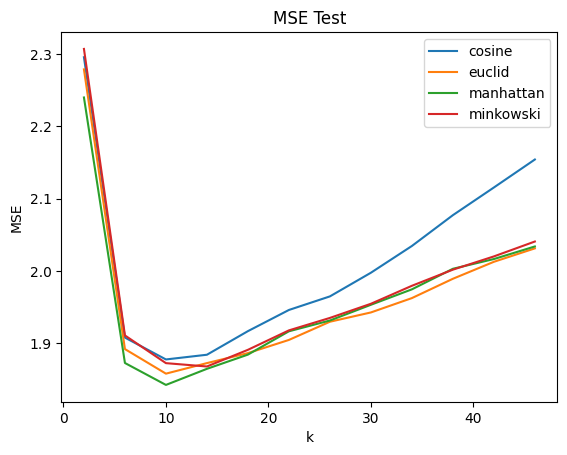

In [ ]:
plt.plot([k for k in range(2, 50,4)],cosine_mse_test, label = 'cosine')
plt.plot([k for k in range(2, 50,4)],euclid_mse_test, label = 'euclid')
plt.plot([k for k in range(2, 50,4)],manhattan_mse_test, label = 'manhattan')
plt.plot([k for k in range(2, 50,4)],minkowski_mse_test, label = 'minkowski')
plt.legend()
plt.title('MSE Test')
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

Text(0, 0.5, 'R2')

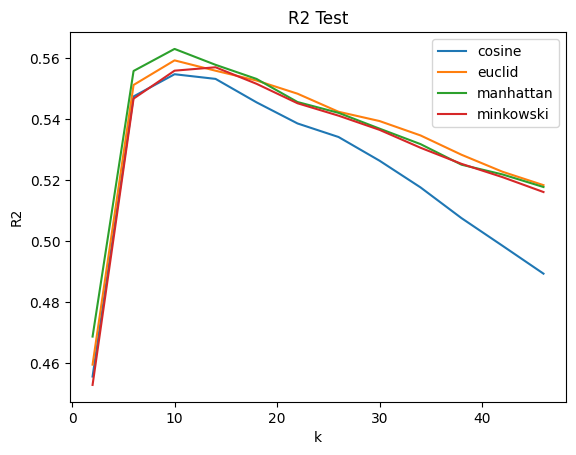

In [ ]:
plt.plot([k for k in range(2, 50,4)],cosine_r2_test, label = 'cosine')
plt.plot([k for k in range(2, 50,4)],euclid_r2_test, label = 'euclid')
plt.plot([k for k in range(2, 50,4)],manhattan_r2_test, label = 'manhattan')
plt.plot([k for k in range(2, 50,4)],minkowski_r2_test, label = 'minkowski')
plt.legend()
plt.title('R2 Test')
plt.xlabel('k')
plt.ylabel('R2')

**Nhận xét**: Ta thấy giữa 3 độ đo khoảng cách là euclid, manhattan,minhowski không có quá nhiều chênh lệch là giá trị tốt nhất của chúng nằm trong khoảng [10,20] cụ thể ở khoảng 15 ta thấy kết quả là tốt nhất.



In [ ]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV

# Định nghĩa lưới tham số (param_grid) để tìm kiếm các giá trị tối ưu cho k, p và metric
param_grid = {
    'k': [k for k in range(5, 20)],             # Các giá trị của k từ 5 đến 19
    'p': [3, 4],                               # Các giá trị của p là 3 và 4
    'metric': ['euclid', 'manhattan', 'minkowski', 'cosine']  # Các loại khoảng cách
}

# Khởi tạo K-Fold Cross-Validation với K=5, dữ liệu được trộn ngẫu nhiên với hạt giống là 42
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Khởi tạo GridSearchCV với mô hình KNeighborsRegressorFromScratch và lưới tham số đã định nghĩa
grid_search = GridSearchCV(estimator=KNeighborsRegressorFromScratch(), param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Thực hiện grid search để tìm kiếm các tham số tốt nhất
grid_search.fit(X, y)

# In ra các tham số tốt nhất và điểm số tương ứng
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation MSE score: ", -grid_search.best_score_)

Best parameters found:  {'k': 10, 'metric': 'manhattan', 'p': 3}
Best cross-validation MSE score:  1.8069248790563002


# **Pipeline**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.sparse import issparse


In [ ]:
url = 'https://raw.githubusercontent.com/KhiemDangLe/Final-Project/main/2-PreprocessingAndEDA/preprocessed_data.csv'

# Đọc dữ liệu từ URL vào DataFrame
df = pd.read_csv(url)


In [ ]:
# Xác định các cột có tỷ lệ giá trị null lớn hơn 50%
null_counts = df.isnull().sum()
columns_to_drop = null_counts[null_counts > len(df) * 0.5].index
df = df.drop(columns=columns_to_drop)


Xóa các feature không mang nhiều ý nghĩa.

In [ ]:
df = df.drop(columns=['article_id','date_posted','total_room_LLm','street_name','price_per_m2'])

In [ ]:
df.columns

Index(['category', 'phone', 'district', 'area', 'bedroom', 'wc',
       'count_conveniences', 'alleyway_property', 'numbers_of_floors',
       'price'],
      dtype='object')

**Feature Selection**

In [ ]:
df = df[['district', 'area', 'bedroom', 'wc','price','numbers_of_floors']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district           5595 non-null   object 
 1   area               5580 non-null   float64
 2   bedroom            4954 non-null   float64
 3   wc                 4537 non-null   float64
 4   price              5595 non-null   float64
 5   numbers_of_floors  5225 non-null   float64
dtypes: float64(5), object(1)
memory usage: 262.4+ KB


In [ ]:
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target

# Tách dataset thành 2 loại numeric(Gồm feature chứa giá trị là số), categorical(Gồm các feture dạng object)
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns

In [ ]:
# Xử lí numeric
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=15)),  # Xử lý missing values bằng KNN imputation
    ('scaler', MinMaxScaler())  # Chuẩn hóa dữ liệu về khoảng min-max
])

In [ ]:
# Xử lí category
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())  # One-hot encoding cho các biến phân loại
])

In [ ]:
col_trans = ColumnTransformer(transformers=[
    ('numeric_transformer', numeric_transformer, numeric_columns),
    ('categorical_transformer', categorical_transformer, categorical_columns)
], remainder='drop', n_jobs=-1)

# Định nghĩa pipeline cho toàn bộ quy trình từ tiền xử lý đến mô hình hóa
pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('regressor', KNeighborsRegressor(n_neighbors= 10, metric='manhattan'))
])


In [ ]:
from sklearn.model_selection import KFold, cross_validate

# Khởi tạo K-Fold Cross-Validation với K=5, dữ liệu được trộn ngẫu nhiên với hạt giống là 42
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Định nghĩa tiêu chí đánh giá bao gồm R2 và MSE (Mean Squared Error)
scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error'}

# Thực hiện cross-validation với pipeline đã định nghĩa và tiêu chí đánh giá
results = cross_validate(pipeline, X, y, cv=kf, scoring=scoring, return_train_score=False)

# In ra các giá trị R2 từ cross-validation
print("Cross-validation R2 scores:", results['test_r2'])

# Tính và in ra giá trị trung bình của R2 từ cross-validation
print("Average cross-validation R2 score:", np.mean(results['test_r2']))

# In ra các giá trị MSE từ cross-validation (đảo ngược dấu vì đã sử dụng 'neg_mean_squared_error')
print("Cross-validation MSE scores:", -results['test_mse'])

# Tính và in ra giá trị trung bình của MSE từ cross-validation
print("Average cross-validation MSE score:", -np.mean(results['test_mse']))

Cross-validation R2 scores: [0.54162798 0.56313502 0.59951519 0.56096012 0.53991075]
Average cross-validation R2 score: 0.5610298126163002
Cross-validation MSE scores: [1.96142127 1.79167093 1.70064777 1.82788355 1.97510536]
Average cross-validation MSE score: 1.851345774974084


# **Report**


## Giới thiệu

Trong báo cáo này, chúng ta sẽ so sánh hiệu suất của hai mô hình hồi quy: Linear Regression và K-Nearest Neighbors (KNN) Regression, dựa trên các chỉ số như MSE (Mean Squared Error) và R2 (Coefficient of Determination). Cả hai mô hình đã được huấn luyện và kiểm tra trên cùng một bộ dữ liệu để đảm bảo tính công bằng trong so sánh.

## Data Preprocessing

- Xóa các cột không quan trọng và có quá nhiều giá trị thiếu để giảm nhiễu dữ liệu.
- Điền giá trị thiếu bằng KNN Imputer để dự đoán giá trị thiếu dựa trên các điểm dữ liệu gần nhất.
- Encode dữ liệu bằng nhiều phương pháp như Target Encoding, Label Encoding, One Hot Encoding, Frequency Encoding, Binary Encoding. Sau đó, lựa chọn phương pháp tốt nhất bằng cách chạy cross_validate và chọn bộ có R2 cao nhất, MSE thấp nhất với một số n_neighbors cụ thể. Trong báo cáo này, bộ One-Hot Encoding được lựa chọn.

- Sử dụng đồ thị tương quan để chọn ra các đặc tính có mối quan hệ tương quan với biến mục tiêu đủ cao.

- Các đặc tính được chọn: district, area, wc, bedroom, number_of_floor, count_conveniences.

- Scale dữ liệu bằng MinMaxScaler để đưa các đặc trưng về cùng một khoảng giá trị.

## Mô tả các mô hình

### Linear Regression:

- **Linear Regression** là một mô hình tuyến tính dự đoán bằng đường thẳng hồi quy tối thiểu hóa tổng bình phương sai số giữa các giá trị quan sát và dự đoán.

  - **Ưu điểm:** Đơn giản và dễ giải thích.
  - **Nhược điểm:** Hiệu quả giảm khi dữ liệu không tuân theo mối quan hệ tuyến tính.

### K-Nearest Neighbors Regression (KNN):

- **KNN Regression** là một mô hình phi tuyến, dự đoán giá trị của một điểm dữ liệu bằng cách lấy trung bình các giá trị của k láng giềng gần nhất, sử dụng các phương pháp đo khoảng cách như Euclidean, Manhattan, Cosine, vv.

  - **Ưu điểm:** Không cần huấn luyện trước, có thể áp dụng trực tiếp cho dữ liệu mới và có tính cập nhật cao.
  - **Nhược điểm:** Tốn chi phí tính toán khi số lượng láng giềng lớn.

## Chỉ số hiệu suất

- **MSE (Mean Squared Error):** Đo lường sai số trung bình của mô hình. Giá trị MSE càng thấp, mô hình dự đoán càng chính xác.
- **R2 (Coefficient of Determination):** Đo lường mức độ mô hình giải thích sự biến thiên của dữ liệu. Giá trị R2 càng cao (gần 1), mô hình giải thích tốt hơn các biến độc lập.

## Hyper Tunning

- Sử dụng đồ thị để thu hẹp khoảng n_neighbors bằng cách tính toán khoảng cách của KNN Regression với các n_neighbors tăng dần.
- Sử dụng GridSearchCV để tìm ra giá trị tối ưu trong khoảng đã thu hẹp.

## Kết quả kiểm tra

Dưới đây là bảng so sánh hiệu suất giữa hai mô hình:

| **Mô hình**           | **MSE** | **R2** |
|------------------------|---------|--------|
| **Linear Regression**  | 2.53    | 0.39   |
| **KNN Regression**     | 1.83    | 0.56   |

## Phân tích kết quả

Dựa trên giá trị MSE và R2, KNN Regression có hiệu suất tốt hơn so với Linear Regression trong bộ dữ liệu này. MSE của KNN Regression thấp hơn, cho thấy khả năng dự đoán chính xác của nó cao hơn so với Linear Regression. Tuy nhiên, lựa chọn giữa hai mô hình phụ thuộc vào đặc tính cụ thể của dữ liệu và mục đích ứng dụng.

## Kết luận

Tóm lại, sự lựa chọn giữa **Linear Regression** và **KNN Regression** phụ thuộc vào tính chất của dữ liệu và yêu cầu về hiệu suất dự đoán. Linear Regression thường hiệu quả khi có mối quan hệ tuyến tính rõ ràng, trong khi KNN Regression thích hợp hơn với dữ liệu có tính phi tuyến tính. Điều này cung cấp cho các nhà phân tích dữ liệu lựa chọn mô hình phù hợp nhất để giải quyết vấn đề cụ thể của họ.
